### Iniciando as biblioteca

In [1]:
# importando os modulos principais

%matplotlib inline
import numpy as np
import pandas as pd
from pathlib import Path

#from datetime import date, datetime
import matplotlib.pyplot as plt
#import os
import seaborn as sns
#import re
sns.set()

import locale
locale.setlocale(locale.LC_ALL, '')

'LC_CTYPE=pt_BR.UTF-8;LC_NUMERIC=pt_BR.UTF-8;LC_TIME=pt_BR.UTF-8;LC_COLLATE=en_US.UTF-8;LC_MONETARY=pt_BR.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=pt_BR.UTF-8;LC_NAME=pt_BR.UTF-8;LC_ADDRESS=pt_BR.UTF-8;LC_TELEPHONE=pt_BR.UTF-8;LC_MEASUREMENT=pt_BR.UTF-8;LC_IDENTIFICATION=pt_BR.UTF-8'

In [2]:
# Definindo os diretórios e arquivos
path_dados   = Path('/home/wesley/data/churn-prediction')
path_parquet = path_dados/'parquet'
path_csv     = path_dados/'csv'

file_parquet             = path_parquet/'flurry.parquet'
file_csv_users           = path_csv/'cp_users.csv'
file_csv_events          = path_csv/'cp_events.csv'
file_csv_events_per_user = path_csv/'cp_events_per_user.csv'
file_csv_users_features  = path_csv/'cp_users_features.csv'

In [3]:
%%time
# Carrega dataframe de eventos
events_per_user = pd.read_csv(file_csv_events_per_user, parse_dates=['eventDate'])
events_per_user.sort_values('eventDate', inplace=True)
print(events_per_user.shape)
events_per_user.info(),
events_per_user.head()

(3805376, 203)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805376 entries, 0 to 3805375
Columns: 203 entries, eventDate to uncaught
dtypes: datetime64[ns](1), float64(201), int64(1)
memory usage: 5.8 GB
CPU times: user 40.8 s, sys: 14.9 s, total: 55.7 s
Wall time: 58.9 s


,eventDate,userId,ActivedNotificationIOS,ApparedMessageWrongLogin,AssociatedWithFacebook,ClickedAdAfterDonate,ClickedAdBeforeDonate,ClickedAdMoreInfo,ClickedBadgesList,ClickedBadgesUnupdated,...,rcdloi-ok,referrer,reportError,requestDeleteAccount,selectImpact,skipTutorialFromOnBoarding,test-referral-64,test-referral-70,test-referral-87,uncaught
0,2017-08-28,1111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,2017-10-02,123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2017-10-02,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2017-10-02,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,2017-10-03,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Carrega dataframe de users
#users = pd.read_csv(path_csv/csv_usersFile, parse_dates=['firstAccess', 'lastAccess'])
users = pd.read_csv(file_csv_users_features)
print(users.shape)
users.info(),
users.head()

(210251, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210251 entries, 0 to 210250
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   userId                            210251 non-null  int64  
 1   deviceModel                       210251 non-null  object 
 2   countryISO                        210251 non-null  object 
 3   firstAccess                       210251 non-null  object 
 4   lastAccess                        210251 non-null  object 
 5   cohort                            210251 non-null  object 
 6   lastDayAccess                     210251 non-null  int64  
 7   calendarDays                      210251 non-null  int64  
 8   activeDays                        210251 non-null  int64  
 9   donationLast90days                50845 non-null   float64
 10  donationTotal                     210251 non-null  float64
 11  averageDonationEventActiveDay     21025

,userId,deviceModel,countryISO,firstAccess,lastAccess,cohort,lastDayAccess,calendarDays,activeDays,donationLast90days,donationTotal,averageDonationEventActiveDay,averageDonationEventCalendarDay,averageDaysBetweenDonationEvents,donationLast120days,donationLast60days
0,1,Galaxy J5 Prime,BR,2017-11-07,2020-04-15,2017-11,1,891,75,14.0,175.0,2.333333,0.196409,3.888889,20.0,7.0
1,10,iOS Emulator,BR,2017-10-18,2019-05-23,2017-10,329,583,21,NaN,5.0,0.238095,0.008576,106.333333,NaN,NaN
2,100,Moto Z (2) Play,BR,2018-12-08,2018-12-08,2018-12,495,1,1,NaN,6.0,6.000000,6.000000,NaN,NaN,NaN
3,1000,Nexus 5,BR,2017-12-01,2017-12-01,2017-12,867,1,1,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN
4,10000,Q6,BR,2018-06-24,2018-06-24,2018-06,662,1,1,NaN,0.0,0.000000,0.000000,NaN,NaN,NaN


In [5]:
# carregando o data set de eventos
events = pd.read_csv(file_csv_events, parse_dates=['firstOccurrence', 'lastOccurrence'])
print(events.shape)
events.info(),
events.head()

(201, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   eventName           201 non-null    object        
 1   firstOccurrence     201 non-null    datetime64[ns]
 2   lastOccurrence      201 non-null    datetime64[ns]
 3   intervalOccurrence  201 non-null    float64       
 4   2017-08             201 non-null    float64       
 5   2017-09             201 non-null    float64       
 6   2017-10             201 non-null    float64       
 7   2017-11             201 non-null    float64       
 8   2017-12             201 non-null    float64       
 9   2018-01             201 non-null    float64       
 10  2018-02             201 non-null    float64       
 11  2018-03             201 non-null    float64       
 12  2018-04             201 non-null    float64       
 13  2018-05             201 non-null    floa

,eventName,firstOccurrence,lastOccurrence,intervalOccurrence,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,...,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04
0,uncaught,2017-08-28,2020-04-16,962.0,2.0,0.0,89.0,220.0,164.0,39.0,...,17201.0,35093.0,33396.0,65754.0,111627.0,11675.0,3887.0,527.0,1308.0,1512.0
1,ativacao,2017-08-28,2017-08-28,0.0,6.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Opened,2017-10-02,2020-04-13,924.0,0.0,0.0,3811.0,5496.0,7167.0,8718.0,...,48.0,22.0,13.0,10.0,12.0,7.0,6.0,0.0,5.0,2.0
3,onBoardingStage,2017-10-02,2019-05-27,602.0,0.0,0.0,969.0,653.0,2547.0,3124.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,openCurtain,2017-10-02,2020-01-16,836.0,0.0,0.0,2262.0,2611.0,3513.0,3444.0,...,14.0,13.0,2.0,4.0,2.0,0.0,5.0,0.0,0.0,0.0


In [6]:
# Validando se está igual o número de usuários no dataframe de eventos e o de usuários
events_per_user.userId.nunique() == users.shape[0], events_per_user.userId.nunique(), users.shape[0]

(True, 210251, 210251)

In [7]:
# definindo duas matrizes uma com as colunas que são de eventos e a outra que não são
NO_EVENTS = ['userId', 'eventDate']
EVENTS = [c for c in events_per_user.columns if c not in NO_EVENTS]
len(EVENTS)

201

## Analise Mensal - Verificar quantos usuários novos por mês e quantos usuários antigos continuam usando o App

In [53]:
# criando colunas categóricas para fazer a analise
df['userRibonAgeLabel'] = pd.cut(df.userRibonAge,bins=[-1,20,40,100,200,9999],
                                 labels=['ThisMonth','LastMonth', 'ThisQuarter','ThisSemester','Older'])

df1 = df[['month_event', 'userRibonAgeLabel', 'userRibonAge']].groupby(['month_event', 'userRibonAgeLabel']).size().reset_index()
df1.columns = ['month_event', 'userRibonAgeLabel', 'count']
df1 = df1.pivot(index='month_event', columns='userRibonAgeLabel', values='count')

In [239]:
df1

userRibonAgeLabel,ThisMonth,LastMonth,ThisQuarter,ThisSemester,Older
month_event,,,,,
2017-08,1,0,0,0,0
2017-10,354,0,0,0,0
2017-11,156,263,0,0,0
2017-12,360,102,216,0,0
2018-01,369,210,240,1,0
2018-02,109,171,165,103,0
2018-03,176,45,215,150,1
2018-04,1436,111,147,239,1
2018-05,3304,1002,131,209,104


In [262]:
df1.to_csv('months_events.csv')

In [81]:
df1.sum(axis=1)

month_event
2017-08        1
2017-10      354
2017-11      419
2017-12      678
2018-01      820
2018-02      548
2018-03      587
2018-04     1934
2018-05     4750
2018-06     5138
2018-07     5459
2018-08     6062
2018-09     8488
2018-10     8828
2018-11     8856
2018-12     8939
2019-01    14387
2019-02    14321
2019-03    15352
2019-04    24333
2019-05    68989
2019-06    42520
2019-07    42952
2019-08    50860
2019-09    40656
2019-10    45542
2019-11    34982
2019-12    31031
2020-01    27234
2020-02    27483
2020-03    27797
2020-04    23395
dtype: int64

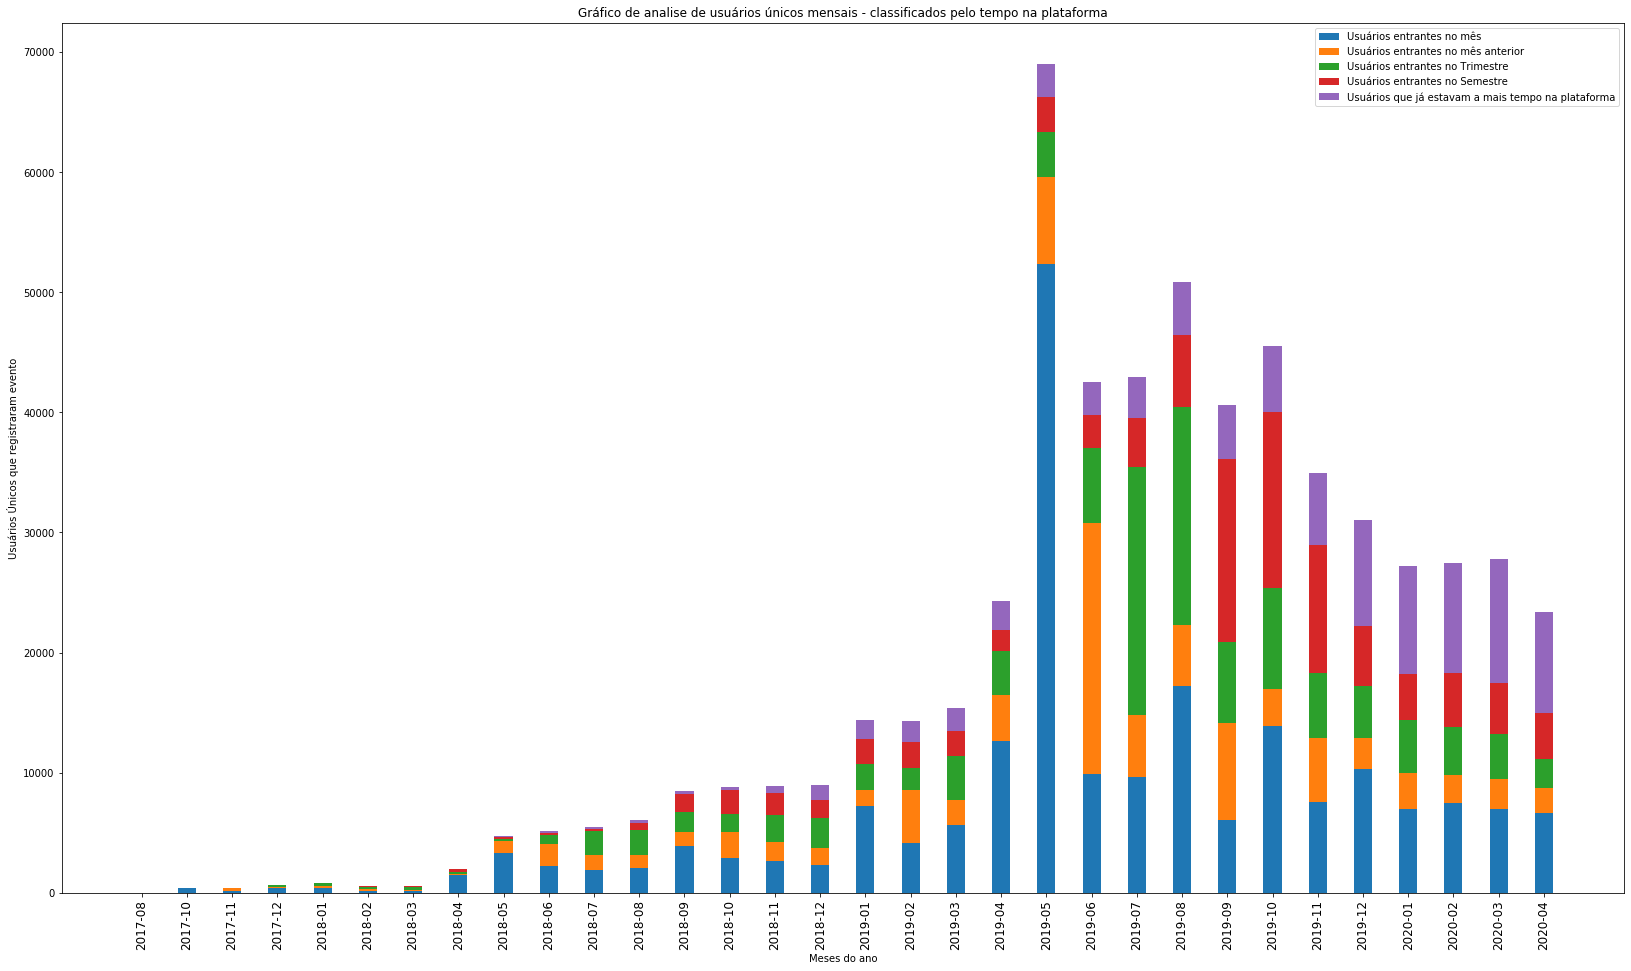

In [91]:
plt.figure(figsize=(28, 16))

ThisMonth    = df1.ThisMonth.to_numpy()
LastMonth    = df1.LastMonth.to_numpy()
ThisQuarter  = df1.ThisQuarter.to_numpy()
ThisSemester = df1.ThisSemester.to_numpy()
Older        = df1.Older.to_numpy()

ind = df1.index

width = 0.4      # the width of the bars: can also be len(x) sequence


p1 = plt.bar(ind, ThisMonth, width)
p2 = plt.bar(ind, LastMonth, width, bottom=ThisMonth)
p3 = plt.bar(ind, ThisQuarter, width, bottom=ThisMonth + LastMonth)
p4 = plt.bar(ind, ThisSemester, width, bottom=ThisMonth + LastMonth + ThisQuarter)
p5 = plt.bar(ind, Older, width, bottom=ThisMonth + LastMonth + ThisQuarter + ThisSemester)

# p1 = plt.bar(ind, ThisMonth, width)
# p2 = plt.bar(ind, LastMonth, width, bottom=ThisMonth)
# p3 = plt.bar(ind, ThisQuarter, width, bottom=LastMonth + ThisMonth)
# p4 = plt.bar(ind, ThisSemester, width, bottom=ThisQuarter + LastMonth + ThisMonth)
# p5 = plt.bar(ind, Older, width, bottom=ThisSemester + ThisQuarter + LastMonth + ThisMonth)

plt.ylabel('Usuários Únicos que registraram evento')
plt.xlabel('Meses do ano')
plt.title('Gráfico de analise de usuários únicos mensais - classificados pelo tempo na plataforma')
plt.xticks(ind, fontsize=12, rotation=90)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Usuários entrantes no mês',
                                                 'Usuários entrantes no mês anterior',
                                                 'Usuários entrantes no Trimestre',
                                                 'Usuários entrantes no Semestre',
                                                 'Usuários que já estavam a mais tempo na plataforma'))

plt.show()

Como previsto a maior parte dos usuários que registraram algum evento no mês são entrantes daquele próprio mês. As demais cores mostram usuários que já estavam a mais tempo na plataforma.

Serve para analisar a retenção. Interessante perceber que o número de usuários antigos vai crescendo ao longo do tempo.

Também serve para analisar a aquisição de usuários do mês.

## Analise de cohort - Verificar quais cohort teve mais retenção

In [87]:
users['lastDayLabel'] = pd.cut(users.lastDayAccess,bins=[-1,30,90,120,150,9999],
                               labels=['Last30Days','Last60Days', 'Last90Days','Last120Days','Inactive'])
users.head()

,userId,deviceModel,countryISO,firstAccess,lastAccess,cohort,donationLast120days,donationLast90days,lastDayAccess,lastDayLabel
0,1,Moto G (5S) Plus,BR,2017-11-07,2020-04-15,2017-11,20.0,14.0,1,Last30Days
1,8,Galaxy S10,BR,2017-10-11,2020-04-15,2017-10,4.0,4.0,1,Last30Days
2,9,Galaxy S8,BR,2017-10-04,2020-04-15,2017-10,14.0,12.0,1,Last30Days
3,23,iPhone XR,BR,2017-10-17,2020-04-14,2017-10,17.0,17.0,2,Last30Days
4,25,Galaxy J7 Prime,BR,2017-10-11,2020-04-15,2017-10,0.0,0.0,1,Last30Days


In [88]:
dfu = users[['userId', 'cohort', 'lastDayLabel']].groupby(['cohort', 'lastDayLabel']).size().reset_index()
dfu.columns = ['cohort', 'lastDayLabel', 'count']
dfu = dfu.pivot(index='cohort', columns='lastDayLabel', values='count')
dfu

lastDayLabel,Last30Days,Last60Days,Last90Days,Last120Days,Inactive
cohort,,,,,
2017-08,0,0,0,0,1
2017-10,46,10,2,4,292
2017-11,14,5,0,0,137
2017-12,15,3,5,0,337
2018-01,20,4,2,2,341
2018-02,3,1,1,1,103
2018-03,11,5,0,1,159
2018-04,104,33,18,23,1258
2018-05,218,63,24,63,2936


In [89]:
dfu.sum(axis=1)

cohort
2017-08        1
2017-10      354
2017-11      156
2017-12      360
2018-01      369
2018-02      109
2018-03      176
2018-04     1436
2018-05     3304
2018-06     2237
2018-07     1897
2018-08     2076
2018-09     3921
2018-10     2896
2018-11     2669
2018-12     2271
2019-01     7229
2019-02     4103
2019-03     5627
2019-04    12671
2019-05    52347
2019-06     9866
2019-07     9593
2019-08    17181
2019-09     6038
2019-10    13879
2019-11     7593
2019-12    10318
2020-01     6973
2020-02     7439
2020-03     6956
2020-04     6671
dtype: int64

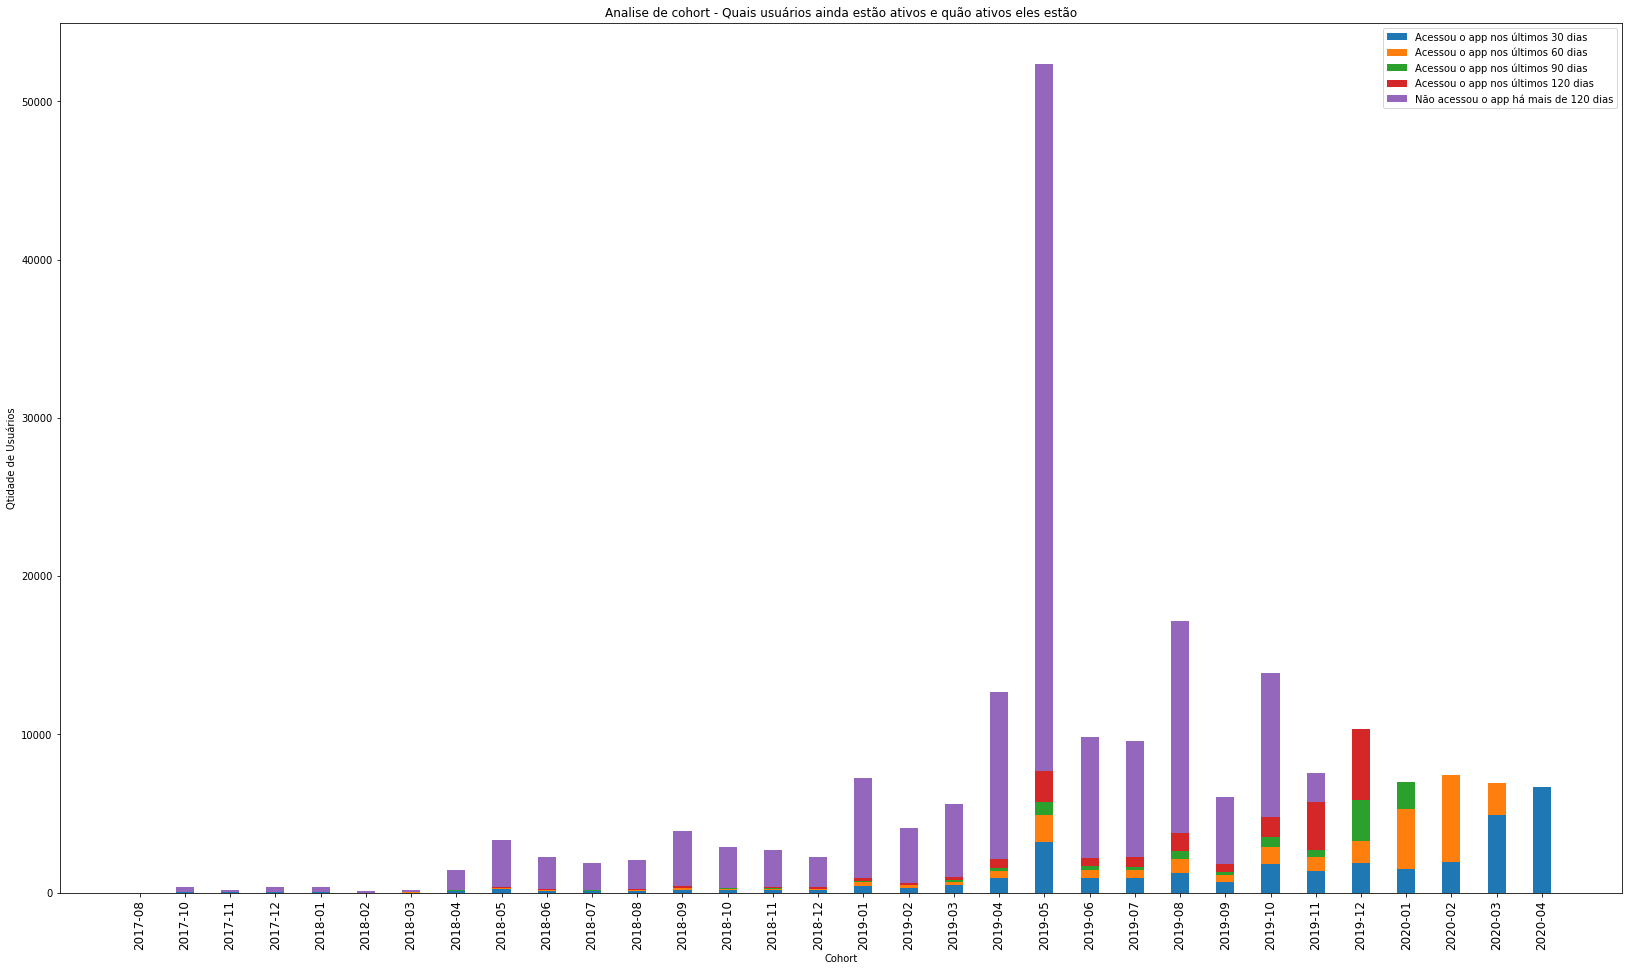

In [90]:
plt.figure(figsize=(28, 16))

Last30Days  = dfu.Last30Days.to_numpy()
Last60Days  = dfu.Last60Days.to_numpy()
Last90Days  = dfu.Last90Days.to_numpy()
Last120Days = dfu.Last120Days.to_numpy()
Inactive    = dfu.Inactive.to_numpy()

ind = dfu.index

width = 0.4      # the width of the bars: can also be len(x) sequence


# p1 = plt.bar(ind, Inactive,    width)
# p2 = plt.bar(ind, Last120Days, width, bottom=Inactive)
# p3 = plt.bar(ind, Last90Days,  width, bottom=Inactive + Last120Days)
# p4 = plt.bar(ind, Last60Days,  width, bottom=Inactive + Last120Days + Last90Days)
# p5 = plt.bar(ind, Last30Days,  width, bottom=Inactive + Last120Days + Last90Days + Last60Days)

p1 = plt.bar(ind, Last30Days,  width)
p2 = plt.bar(ind, Last60Days,  width, bottom=Last30Days)
p3 = plt.bar(ind, Last90Days,  width, bottom=Last30Days + Last60Days)
p4 = plt.bar(ind, Last120Days, width, bottom=Last30Days + Last60Days + Last90Days)
p5 = plt.bar(ind, Inactive,    width, bottom=Last30Days + Last60Days + Last90Days + Last120Days)


plt.ylabel('Qtidade de Usuários')
plt.xlabel('Cohort')
plt.title('Analise de cohort - Quais usuários ainda estão ativos e quão ativos eles estão')
plt.xticks(ind, fontsize=12, rotation=90)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Acessou o app nos últimos 30 dias',
                                                 'Acessou o app nos últimos 60 dias',
                                                 'Acessou o app nos últimos 90 dias',
                                                 'Acessou o app nos últimos 120 dias',
                                                 'Não acessou o app há mais de 120 dias'))

plt.show()

O gráfico é quantitativo, assim ele mostra quais os meses que teve mais retenção, mas pode ser que em termos percentuais não seja o mês com maior retenção.

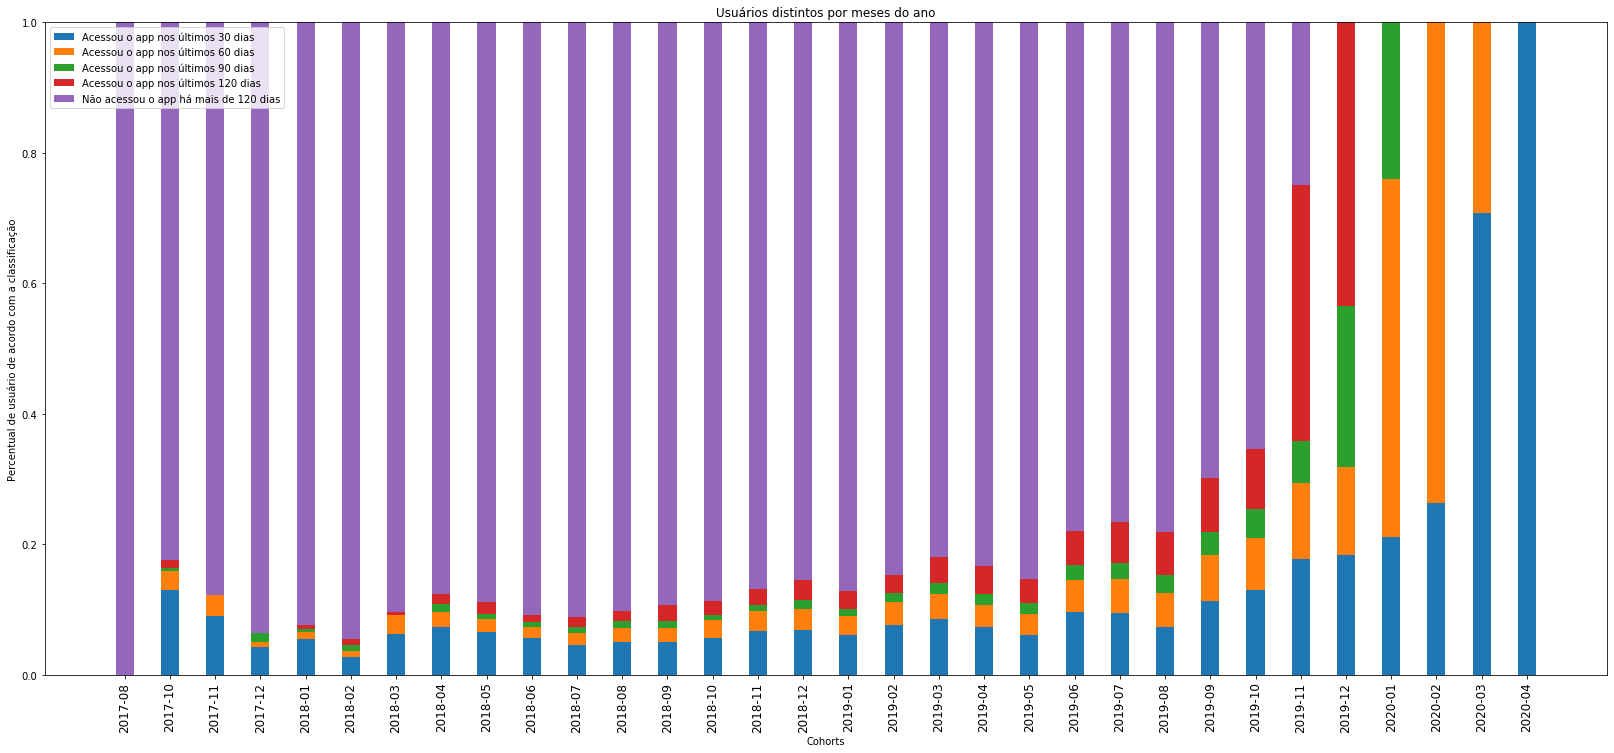

In [94]:
#dfu.Inactive/dfu.sum(axis=1).to_numpy()

plt.figure(figsize=(28, 12))

Last30Days  = (dfu.Last30Days  / dfu.sum(axis=1)).to_numpy()
Last60Days  = (dfu.Last60Days  / dfu.sum(axis=1)).to_numpy()
Last90Days  = (dfu.Last90Days  / dfu.sum(axis=1)).to_numpy()
Last120Days = (dfu.Last120Days / dfu.sum(axis=1)).to_numpy()
Inactive    = (dfu.Inactive    / dfu.sum(axis=1)).to_numpy()

ind = dfu.index

width = 0.4      # the width of the bars: can also be len(x) sequence


# p1 = plt.bar(ind, Inactive,    width)
# p2 = plt.bar(ind, Last120Days, width, bottom=Inactive)
# p3 = plt.bar(ind, Last90Days,  width, bottom=Inactive + Last120Days)
# p4 = plt.bar(ind, Last60Days,  width, bottom=Inactive + Last120Days + Last90Days)
# p5 = plt.bar(ind, Last30Days,  width, bottom=Inactive + Last120Days + Last90Days + Last60Days)

p1 = plt.bar(ind, Last30Days,  width)
p2 = plt.bar(ind, Last60Days,  width, bottom=Last30Days)
p3 = plt.bar(ind, Last90Days,  width, bottom=Last30Days + Last60Days)
p4 = plt.bar(ind, Last120Days, width, bottom=Last30Days + Last60Days + Last90Days)
p5 = plt.bar(ind, Inactive,    width, bottom=Last30Days + Last60Days + Last90Days + Last120Days)


plt.ylabel('Percentual de usuário de acordo com a classificação')
plt.xlabel('Cohorts')

plt.title('Analise de Cohort - Percenutal de usuários do cohort que ainda está usando a plataforma')
plt.xticks(ind, fontsize=12, rotation=90)
# plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Acessou o app nos últimos 30 dias',
                                                 'Acessou o app nos últimos 60 dias',
                                                 'Acessou o app nos últimos 90 dias',
                                                 'Acessou o app nos últimos 120 dias',
                                                 'Não acessou o app há mais de 120 dias'), loc='upper left')
plt.show()

Os últimos meses não tem usuários inativos. Então serve mais para avaliar os cohorts antigos.

## Analise de usuários que usaram a plataforma nos últimos dias

Vamos identificar os usuários que fizeram ao menos uma doação nos últimos 90 e 120 dias.

In [97]:
#estabelecendo o número de doações para definir o perfil do usuário ativo
n_donationDays = 1 # define o minimo de dias fazendo doacao durante o periodo de corte
sliceUsers90 = users.donationLast90days >= n_donationDays
sliceUsers120 = users.donationLast120days >= n_donationDays

In [104]:
users['donationLast120Label'] = pd.cut(users.donationLast120days,bins=[0,1,2,3,8,200],
                                  labels=['Doou1','Doou2', 'Doou3','Doou3_8','DoouMais8'])
users['donationLast90Label'] = pd.cut(users.donationLast90days,bins=[0,1,2,3,8,200],
                                  labels=['Doou1','Doou2', 'Doou3','Doou3_8','DoouMais8'])
users.head()

,userId,deviceModel,countryISO,firstAccess,lastAccess,cohort,donationLast120days,donationLast90days,lastDayAccess,lastDayLabel,donationLast120Label,donationLast90Label
0,1,Moto G (5S) Plus,BR,2017-11-07,2020-04-15,2017-11,20.0,14.0,1,Last30Days,DoouMais8,DoouMais8
1,8,Galaxy S10,BR,2017-10-11,2020-04-15,2017-10,4.0,4.0,1,Last30Days,Doou3_8,Doou3_8
2,9,Galaxy S8,BR,2017-10-04,2020-04-15,2017-10,14.0,12.0,1,Last30Days,DoouMais8,DoouMais8
3,23,iPhone XR,BR,2017-10-17,2020-04-14,2017-10,17.0,17.0,2,Last30Days,DoouMais8,DoouMais8
4,25,Galaxy J7 Prime,BR,2017-10-11,2020-04-15,2017-10,0.0,0.0,1,Last30Days,NaN,NaN


In [100]:
# Computing the ECDF
# Função para apoiar nas analises
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n
    
    return x, y

### Analise dos Usuários Ativos nos últimos de 120 dias

Data de corte: 19/12/2019 a 16/04/2020

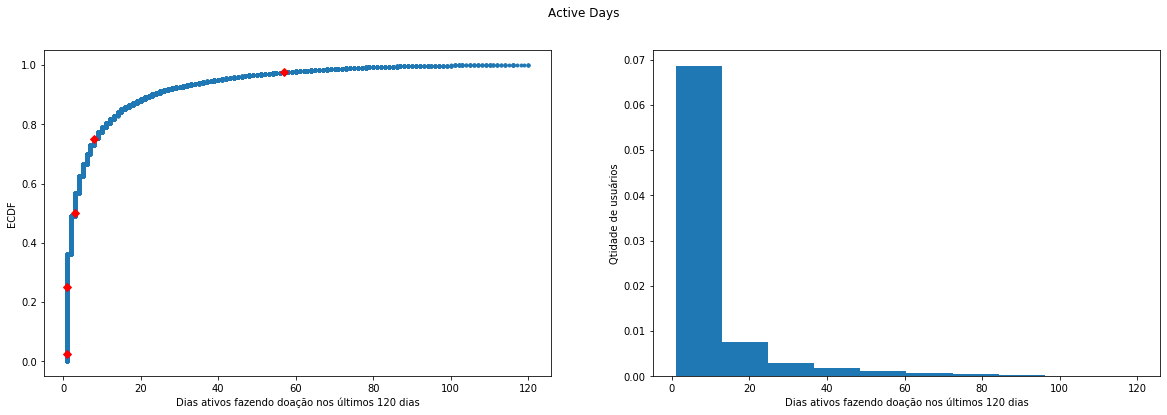

In [101]:
# Generate subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
_ = fig.suptitle('Analise da quantidade de dias fazendo doação - Últimos 120 dias')

# Generate CDFs
x_ecdf, y_ecdf = ecdf(users[sliceUsers120].donationLast120days)

# Plot CDFs
_ = ax1.plot(x_ecdf, y_ecdf, marker='.', linestyle='none')

# Specify array of percentiles: percentiles
percentiles = [2.5, 25, 50, 75, 97.5]
# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(users[sliceUsers120].donationLast120days, percentiles)

# Overlay percentiles as red diamonds.
ptiles = [x/100 for x in percentiles]
_ = ax1.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')

# Label axes
_ = ax1.set_xlabel('Dias ativos fazendo doação nos últimos 120 dias')
_ = ax1.set_ylabel('ECDF')

# Make the histogram
_ = ax2.hist(users[sliceUsers120].donationLast120days, bins=10, density=True, histtype='stepfilled')


# Label axes
_ = ax2.set_xlabel('Dias ativos fazendo doação nos últimos 120 dias')
_ = ax2.set_ylabel('Qtidade de usuários')

# Show the plot
plt.show()

In [98]:
users[sliceUsers120].donationLast120days.describe()

count    40205.000000
mean         8.542395
std         14.756966
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        120.000000
Name: donationLast120days, dtype: float64

Foram 40.205 usuários ativos nos últimos 120 dias.

Período de 19/12/2019 a 16/04/2020.

Como é possível observar, a mediana é de 3. Ou seja, 50% dos usuários ativos nos últimos 120 dias, aproximadamente 20 mil usuários, usaram o app 3 dias e fizeram uma doação.

25% dos usuários (aproximadamente 10 mil usuários) estiveram mais de 8 dias ativos fazendo doações, sendo que alguns fizeram doações todos os dias.

Agora vamos fazer uma analise por cohort. Quem esteve ativo nos últimos 120 dias e quantas vezes eles entraram na plataforma nesse período para fazer doações.

In [109]:
dfc = users.loc[sliceUsers120, ['userId', 'cohort', 'donationLast120Label']].\
      groupby(['cohort', 'donationLast120Label']).size().reset_index()
dfc.columns = ['cohort', 'donationLast120Label', 'count']
dfc = dfc.pivot(index='cohort', columns='donationLast120Label', values='count')
dfc

donationLast120Label,Doou1,Doou2,Doou3,Doou3_8,DoouMais8
cohort,,,,,
2017-10,9,8,6,10,19
2017-11,1,4,3,2,7
2017-12,6,0,1,3,6
2018-01,7,1,1,7,8
2018-02,1,0,0,1,2
2018-03,4,0,1,3,5
2018-04,33,14,10,29,40
2018-05,59,36,22,38,75
2018-06,35,17,14,17,54


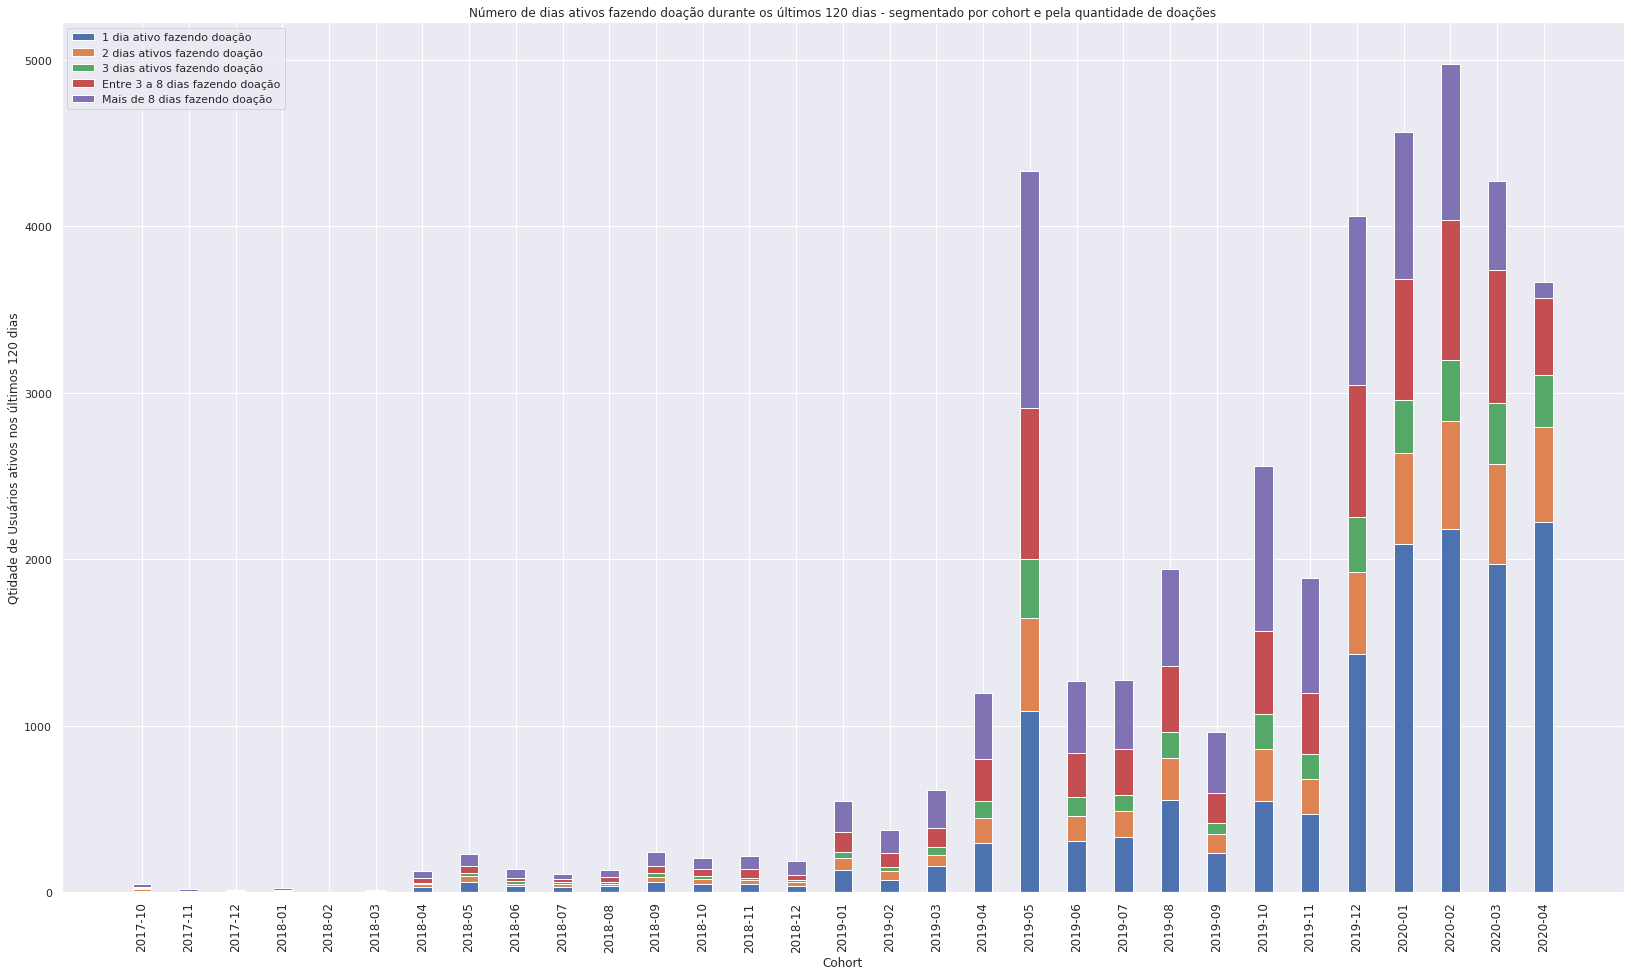

In [110]:
plt.figure(figsize=(28, 16))

Doou1     = dfc.Doou1.to_numpy()
Doou2     = dfc.Doou2.to_numpy()
Doou3     = dfc.Doou3.to_numpy()
Doou3_8   = dfc.Doou3_8.to_numpy()
DoouMais8 = dfc.DoouMais8.to_numpy()

ind = dfc.index

width = 0.4      # the width of the bars: can also be len(x) sequence


# p1 = plt.bar(ind, Inactive,    width)
# p2 = plt.bar(ind, Last120Days, width, bottom=Inactive)
# p3 = plt.bar(ind, Last90Days,  width, bottom=Inactive + Last120Days)
# p4 = plt.bar(ind, Last60Days,  width, bottom=Inactive + Last120Days + Last90Days)
# p5 = plt.bar(ind, Last30Days,  width, bottom=Inactive + Last120Days + Last90Days + Last60Days)

p1 = plt.bar(ind, Doou1,     width)
p2 = plt.bar(ind, Doou2,     width, bottom=Doou1)
p3 = plt.bar(ind, Doou3,     width, bottom=Doou1 + Doou2)
p4 = plt.bar(ind, Doou3_8,   width, bottom=Doou1 + Doou2 + Doou3)
p5 = plt.bar(ind, DoouMais8, width, bottom=Doou1 + Doou2 + Doou3 + Doou3_8)


plt.ylabel('Qtidade de Usuários ativos nos últimos 120 dias')
plt.xlabel('Cohort')
plt.title('Número de dias ativos fazendo doação durante os últimos 120 dias - segmentado por cohort e pela quantidade de doações')
plt.xticks(ind, fontsize=12, rotation=90)
# plt.yticks(np.arange(0, 81, 10))z
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('1 dia ativo fazendo doação','2 dias ativos fazendo doação',
                                                 '3 dias ativos fazendo doação','Entre 3 a 8 dias fazendo doação',
                                                 'Mais de 8 dias fazendo doação'))

plt.show()

O gráfico mostra que há entrantes que já começam doando bastante. Tem usuários do mês de Abril de 2020 que já doou mais de 8 vezes. Também mostra que tem usuários que se mantém engajado. Os usuários de Maio de 2019, que foi uma faz maiores aquisições, ainda mantém muitos usuários ativos.

### Analise considerando atividades de doação nos últimos 90 dias

Data de corte: 18/01/2020 a 16/04/2020

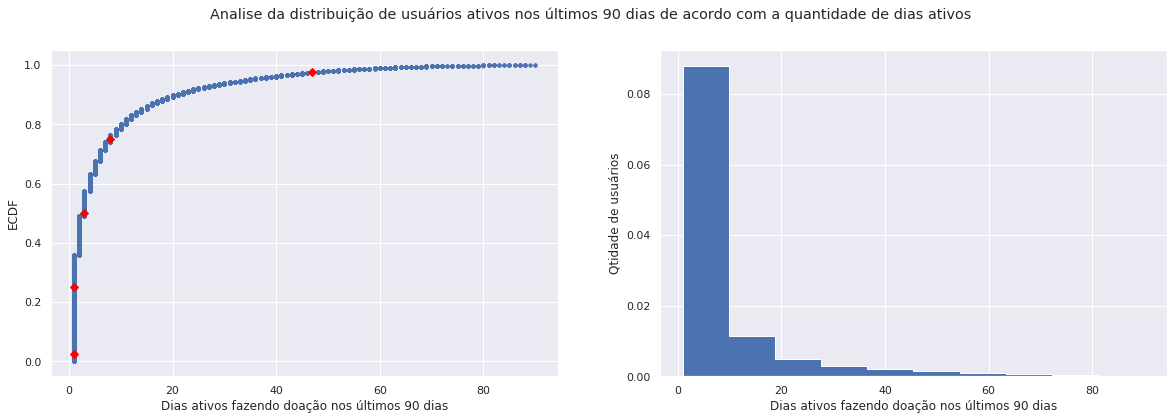

In [116]:
# Generate subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
_ = fig.suptitle('Analise da distribuição de usuários ativos nos últimos 90 dias de acordo com a quantidade de dias ativos')

# Generate CDFs
x_ecdf, y_ecdf = ecdf(users[sliceUsers90].donationLast90days)

# Plot CDFs
_ = ax1.plot(x_ecdf, y_ecdf, marker='.', linestyle='none')

# Specify array of percentiles: percentiles
percentiles = [2.5, 25, 50, 75, 97.5]
# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(users[sliceUsers90].donationLast90days, percentiles)

# Overlay percentiles as red diamonds.
ptiles = [x/100 for x in percentiles]
_ = ax1.plot(ptiles_vers, ptiles, marker='D', color='red', linestyle='none')

# Label axes
_ = ax1.set_xlabel('Dias ativos fazendo doação nos últimos 90 dias')
_ = ax1.set_ylabel('ECDF')

# Make the histogram
_ = ax2.hist(users[sliceUsers90].donationLast90days, bins=10, density=True, histtype='stepfilled')


# Label axes
_ = ax2.set_xlabel('Dias ativos fazendo doação nos últimos 90 dias')
_ = ax2.set_ylabel('Qtidade de usuários')

# Show the plot
plt.show()

In [118]:
users[sliceUsers90].donationLast90days.describe()

count    34825.000000
mean         7.603704
std         12.181268
min          1.000000
25%          1.000000
50%          3.000000
75%          8.000000
max         90.000000
Name: donationLast90days, dtype: float64

Foram 34.825 usuários ativos nos últimos 120 dias.

Período de 18/01/2020 a 16/04/2020.

A mediana continua a mesma do período analisado anteriormente, 3 dias ativos fazendo doação.
Ou seja, aproximadamente 17 mil usuários acessaram o app 3 dias para fazer doação nos últimos 90 dias.

25% dos usuários (aproximadamente 8,5 mil usuários) estiveram mais de 8 dias ativos fazendo doações, sendo que alguns fizeram doações todos os dias.

Agora vamos fazer uma analise por cohort. Quem esteve ativo nos últimos 120 dias e quantas vezes eles entraram na plataforma nesse período para fazer doações.

In [119]:
dfc90 = users.loc[sliceUsers90, ['userId', 'cohort', 'donationLast90Label']].\
       groupby(['cohort', 'donationLast90Label']).size().reset_index()
dfc90.columns = ['cohort', 'donationLast90Label', 'count']
dfc90 = dfc90.pivot(index='cohort', columns='donationLast90Label', values='count')
dfc90

donationLast90Label,Doou1,Doou2,Doou3,Doou3_8,DoouMais8
cohort,,,,,
2017-10,8,9,4,11,16
2017-11,4,1,2,3,6
2017-12,4,1,0,3,6
2018-01,6,1,2,6,8
2018-02,2,0,0,0,2
2018-03,4,0,2,2,4
2018-04,34,11,11,20,38
2018-05,52,36,14,38,63
2018-06,27,17,10,21,46


In [120]:
dfc.sum(axis=1).sum(), dfc90.sum(axis=1).sum()

(40205, 34825)

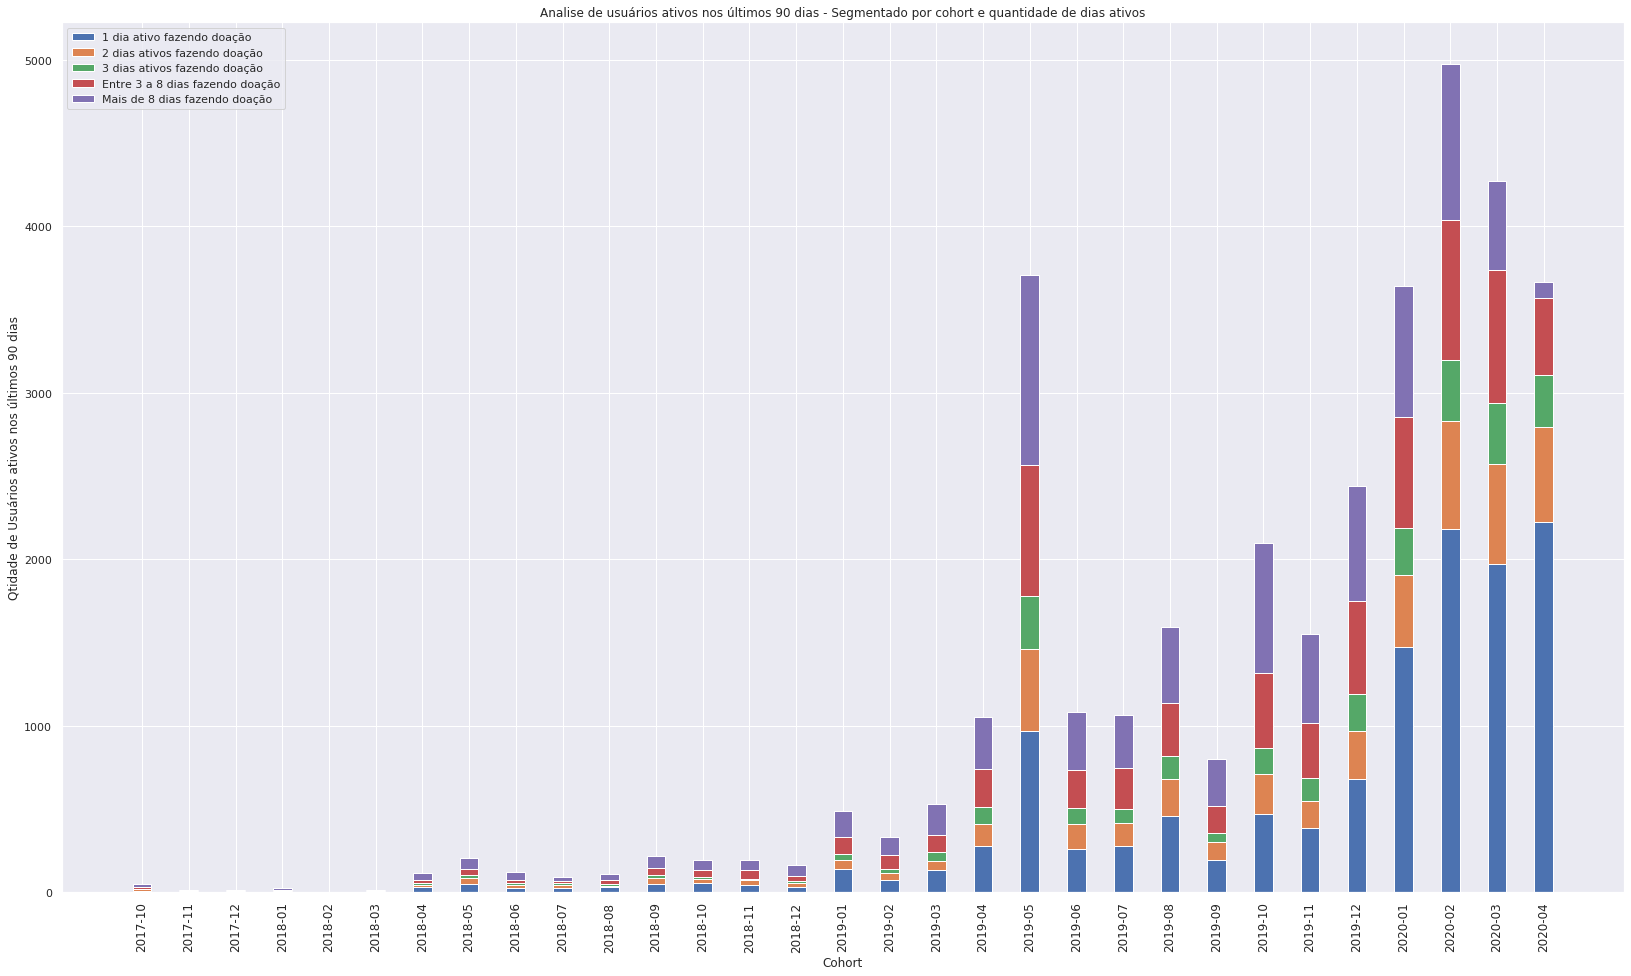

In [121]:
plt.figure(figsize=(28, 16))

Doou1     = dfc90.Doou1.to_numpy()
Doou2     = dfc90.Doou2.to_numpy()
Doou3     = dfc90.Doou3.to_numpy()
Doou3_8   = dfc90.Doou3_8.to_numpy()
DoouMais8 = dfc90.DoouMais8.to_numpy()

ind = dfc.index

width = 0.4      # the width of the bars: can also be len(x) sequence


# p1 = plt.bar(ind, Inactive,    width)
# p2 = plt.bar(ind, Last120Days, width, bottom=Inactive)
# p3 = plt.bar(ind, Last90Days,  width, bottom=Inactive + Last120Days)
# p4 = plt.bar(ind, Last60Days,  width, bottom=Inactive + Last120Days + Last90Days)
# p5 = plt.bar(ind, Last30Days,  width, bottom=Inactive + Last120Days + Last90Days + Last60Days)

p1 = plt.bar(ind, Doou1,     width)
p2 = plt.bar(ind, Doou2,     width, bottom=Doou1)
p3 = plt.bar(ind, Doou3,     width, bottom=Doou1 + Doou2)
p4 = plt.bar(ind, Doou3_8,   width, bottom=Doou1 + Doou2 + Doou3)
p5 = plt.bar(ind, DoouMais8, width, bottom=Doou1 + Doou2 + Doou3 + Doou3_8)


plt.ylabel('Qtidade de Usuários ativos nos últimos 90 dias')
plt.xlabel('Cohort')
plt.title('Analise de usuários ativos nos últimos 90 dias - Segmentado por cohort e quantidade de dias ativos')
plt.xticks(ind, fontsize=12, rotation=90)
# plt.yticks(np.arange(0, 81, 10))z
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('1 dia ativo fazendo doação','2 dias ativos fazendo doação',
                                                 '3 dias ativos fazendo doação','Entre 3 a 8 dias fazendo doação',
                                                 'Mais de 8 dias fazendo doação'))

plt.show()

O gráfico que fica muito parecido na distribuição.

A dúvida a ser investigada é os usuários que acessaram em 120 dias mas não nos últimos 90 dias, eles vão abandonar a plataforma ou eles retornam.

In [124]:
print(users[users.donationLast120days >= 2].shape[0],
users[users.donationLast90days >= 2].shape[0])

25691 22281


Se for estabelecido um critério de usuários que entraram no app para fazer doação mais de 2 dias. Os valores variam pelo período, conforme esperado.

Para o período de 120 dias, são 25.691 usuários que entraram na plataforma dois ou mais dias para fazer doação.

Para o período de 90 dias, são 22.281 usuáios.

Vamos considerar como usuários ativos. Aqueles que entraram na plataforma mais de 2 dias para fazer doação.

Assim vamos clusterizar esses usuários para tentar identificar quais são os comportamentos desses usuários, fazendo a analise dos eventos que eles realizam e outras features que iremos criar.

Também vamos ver o comportamento dos que saem da plataforma.

O objetivo é identificar nos primeiros dias de uso, se o usuário vai usar ou não a plataforma.

In [132]:
arq = 'ribon_users_features_basicas_' + str(lastDay.date()) + '.csv'
users.to_csv(path_csv/arq, index=False)

### Criando o dataframe de usuários ativos e inativos

No total vão ser 4 dataframes, 2 para usuários ativos e 2 para usuários inativos.

Esses arquivos são os mesmo de users e events_per_user só que recortado com apenas os usuários ativos ou inativos.

Os usuários ativos serão usados para a modelagem de clusters e para a modelagem de churn.

Os usuários inativos serão usados para a modelagem de churn.

Há bem mais usuários inativos do que usuários ativos. Assim para manter um balanceamento o mais próximo possível, peguei uma amostra de usuários dos mesmo cohorts que os usuários ativos. Acreidto que essa abordagem poderá ajudar na modelagem de churn.

In [6]:
# arq='ribon_users_features_basicas_2020-04-16.csv'

# # carregando o data set de eventos
# users = pd.read_csv(path_csv/arq, parse_dates=['firstAccess', 'lastAccess'])
# print(users.shape)
# users.info(),
# users.head()

(208716, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208716 entries, 0 to 208715
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   userId                208716 non-null  int64         
 1   deviceModel           208716 non-null  object        
 2   countryISO            208716 non-null  object        
 3   firstAccess           208716 non-null  datetime64[ns]
 4   lastAccess            208716 non-null  datetime64[ns]
 5   cohort                208716 non-null  object        
 6   donationLast120days   58594 non-null   float64       
 7   donationLast90days    50707 non-null   float64       
 8   lastDayAccess         208716 non-null  int64         
 9   lastDayLabel          208716 non-null  object        
 10  donationLast120Label  40205 non-null   object        
 11  donationLast90Label   34825 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), o

/home/wesley/anaconda3/envs/ribon/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,userId,deviceModel,countryISO,firstAccess,lastAccess,cohort,donationLast120days,donationLast90days,lastDayAccess,lastDayLabel,donationLast120Label,donationLast90Label
0,1,Moto G (5S) Plus,BR,2017-11-07,2020-04-15,2017-11,20.0,14.0,1,Last30Days,DoouMais8,DoouMais8
1,8,Galaxy S10,BR,2017-10-11,2020-04-15,2017-10,4.0,4.0,1,Last30Days,Doou3_8,Doou3_8
2,9,Galaxy S8,BR,2017-10-04,2020-04-15,2017-10,14.0,12.0,1,Last30Days,DoouMais8,DoouMais8
3,23,iPhone XR,BR,2017-10-17,2020-04-14,2017-10,17.0,17.0,2,Last30Days,DoouMais8,DoouMais8
4,25,Galaxy J7 Prime,BR,2017-10-11,2020-04-15,2017-10,0.0,0.0,1,Last30Days,NaN,NaN


In [19]:
# Criando o dataframe de  usuários ativos
# Considerando os usuários que entraram pelo menos duas vezes na plataforma nos últimos 90 dias para fazer doações
activeUsers = users[users.donationLast90days >= 2]
print(activeUsers.shape)
activeUsers.head()

(22281, 12)


,userId,deviceModel,countryISO,firstAccess,lastAccess,cohort,donationLast120days,donationLast90days,lastDayAccess,lastDayLabel,donationLast120Label,donationLast90Label
0,1,Moto G (5S) Plus,BR,2017-11-07,2020-04-15,2017-11,20.0,14.0,1,Last30Days,DoouMais8,DoouMais8
1,8,Galaxy S10,BR,2017-10-11,2020-04-15,2017-10,4.0,4.0,1,Last30Days,Doou3_8,Doou3_8
2,9,Galaxy S8,BR,2017-10-04,2020-04-15,2017-10,14.0,12.0,1,Last30Days,DoouMais8,DoouMais8
3,23,iPhone XR,BR,2017-10-17,2020-04-14,2017-10,17.0,17.0,2,Last30Days,DoouMais8,DoouMais8
5,34,moto g(6),BR,2017-10-11,2020-04-15,2017-10,20.0,15.0,1,Last30Days,DoouMais8,DoouMais8


In [79]:
# criando o dataframe de usuários inativos considerando o cohort.
# para balancear ao máximo, foram pegas amostras na mesma quantidade por cohort.
inactiveUsers = pd.DataFrame()

for cohort, size in activeUsers.groupby('cohort').size().items():
    inactiveUsers = pd.concat([inactiveUsers,
                               users[(users.donationLast90days.fillna(0) < 2) & (users['cohort'] == cohort)].
                               sample(size)])
    
    print(cohort, size)

2017-10 40
2017-11 12
2017-12 10
2018-01 17
2018-02 2
2018-03 8
2018-04 80
2018-05 151
2018-06 94
2018-07 66
2018-08 80
2018-09 168
2018-10 138
2018-11 152
2018-12 131
2019-01 350
2019-02 258
2019-03 398
2019-04 772
2019-05 2742
2019-06 820
2019-07 784
2019-08 1134
2019-09 607
2019-10 1629
2019-11 1166
2019-12 1763
2020-01 2170
2020-02 2792
2020-03 2302
2020-04 1445


In [129]:
print(inactiveUsers.shape)
inactiveUsers.head()

(22281, 12)


,userId,deviceModel,countryISO,firstAccess,lastAccess,cohort,donationLast120days,donationLast90days,lastDayAccess,lastDayLabel,donationLast120Label,donationLast90Label
189539,732,Galaxy S7 Edge,BR,2017-10-27,2017-11-24,2017-10,NaN,NaN,874,Inactive,NaN,NaN
193104,779,Moto G3,BR,2017-10-30,2017-12-11,2017-10,NaN,NaN,857,Inactive,NaN,NaN
82895,3,Mi A2,BR,2017-10-06,2019-10-23,2017-10,NaN,NaN,176,Inactive,NaN,NaN
168635,426,Prime,BR,2017-10-08,2018-04-26,2017-10,NaN,NaN,721,Inactive,NaN,NaN
153054,21,Galaxy Note8,BR,2017-10-15,2018-10-10,2017-10,NaN,NaN,554,Inactive,NaN,NaN


In [130]:
# verificando o shape dos dois dataframes
inactiveUsers.shape == activeUsers.shape

True

In [22]:
# criando o arquivo de events_per_user para ativos e inativos
# verificando o tamanho total para avaliar o quanto foi filtrado
events_per_user.shape

(3771908, 203)

In [32]:
%%time
events_per_user['activeUser'] = events_per_user.userId.\
                                        map(lambda u: activeUsers.loc[activeUsers.userId==u, 'donationLast90days'].values.size > 0)

CPU times: user 22min 29s, sys: 181 ms, total: 22min 29s
Wall time: 22min 29s


In [119]:
%%time
events_per_user['inactiveUser'] = events_per_user.userId.\
                                        map(lambda u: inactiveUsers.loc[inactiveUsers.userId==u].shape[0] == 1)

CPU times: user 41min 24s, sys: 1.02 s, total: 41min 25s
Wall time: 41min 27s


In [121]:
events_per_user[events_per_user.inactiveUser].shape

(168217, 205)

In [117]:
events_per_user[events_per_user.activeUser].shape

(1525993, 205)

In [122]:
events_per_user[events_per_user.inactiveUser & events_per_user.activeUser].shape

(0, 205)

In [127]:
activeEvents_per_User = events_per_user[events_per_user.activeUser]
inactiveEvents_per_User = events_per_user[events_per_user.inactiveUser]
print(activeEvents_per_User.shape[0], inactiveEvents_per_User.shape[0])

1525993 168217


In [2]:
activeUsers.drop(['donationLast120days', 'donationLast120Label'], axis=1, inplace=True)
inactiveUsers.drop(['donationLast120days', 'donationLast120Label'], axis=1, inplace=True)
activeEvents_per_User.drop(['ativacao', 'activeUser', 'inactiveUser'], axis=1, inplace=True)
inactiveEvents_per_User.drop(['ativacao', 'activeUser', 'inactiveUser'], axis=1, inplace=True)

NameError: name 'activeUsers' is not defined

In [128]:
# salvando os arquivos para serem usados posteriormente na definição atual
inactiveUsers.to_csv(path_csv/'inactiveUsersLatest.csv', index=False)
activeUsers.to_csv(path_csv/'activeUsersLatest.csv', index=False)
inactiveEvents_per_User.to_csv(path_csv/'inactiveEvents_per_UsersLatest.csv', index=False)
activeEvents_per_User.to_csv(path_csv/'activeEvents_per_UsersLatest.csv', index=False)